In [1]:
import tensorflow as tf
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import math
from keras import regularizers, optimizers

Using TensorFlow backend.


In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df = pd.concat([df_train, df_test])

In [3]:
df

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [4]:
df_train['Survived'].sum()/len(df_train.index)

0.38383838383838381

In [5]:
def feature_engineering(data_frame):
    df_copy = data_frame.copy()
    df_copy['AgeModulo'] = df_copy['Age'] % 5
    df_copy['IsBasy'] = df_copy['Age'] < 2
    df_copy['IsYoungChildren'] = df_copy['Age'] < 7
    df_copy['IsChildren'] = df_copy['Age'] < 12
    df_copy['IsAdolescent'] = df_copy['Age'] < 18
    df_copy['IsOld'] = df_copy['Age'] > 60
    df_copy['FareModulo'] = df_copy['Fare'] % 5
    df_copy['IsInCabin'] = pd.isnull(df_copy['Cabin']).apply(lambda x : not x)
    return df_copy

In [6]:
df = feature_engineering(df)

In [7]:
LABEL = ['Survived']
ID = ['PassenderId']
FEATURES = ['Pclass', 'Sex', 'AgeModulo', 'SibSp', 'Parch', 'Embarked', 'FareModulo', 
            'IsBasy', 'IsYoungChildren', 'IsChildren', 'IsAdolescent', 'IsOld',
           'IsInCabin']

In [8]:
#Convert to categorical
df[LABEL] = df[LABEL].astype(str)
df[FEATURES] = df[FEATURES].astype(str)
df_one_hot = pd.get_dummies(df[FEATURES], dummy_na=True)

In [9]:
df_one_hot_train = df_one_hot[0:len(df_train.index)]
df_one_hot_test = df_one_hot[len(df_train.index)-1:-1]

In [21]:
dropout_rate = 0.5
hidden_size = 75

model = Sequential()
model.add(Dense(units=hidden_size, activation='relu', input_dim=len(df_one_hot.columns)))
model.add(Dropout(dropout_rate, noise_shape=None, seed=None))
model.add(Dense(units=hidden_size, activation='relu', input_dim=hidden_size))
model.add(Dropout(dropout_rate, noise_shape=None, seed=None))
model.add(Dense(units=2, activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=0.00001, decay=1e-7),
              metrics=['accuracy'])

In [22]:
history = model.fit(df_one_hot_train, 
                    pd.get_dummies(df_train[LABEL].astype(str)), 
                    epochs=1000, 
                    batch_size=32, 
                    validation_split=0.2,
                   callbacks=[EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')])

Train on 712 samples, validate on 179 samples
Epoch 1/1000
712/712 [==============================] - 0s 266us/step - loss: 0.7130 - acc: 0.4930 - val_loss: 0.6971 - val_acc: 0.4804
Epoch 2/1000
712/712 [==============================] - 0s 73us/step - loss: 0.7163 - acc: 0.4986 - val_loss: 0.6947 - val_acc: 0.4804
Epoch 3/1000
712/712 [==============================] - 0s 69us/step - loss: 0.7080 - acc: 0.5014 - val_loss: 0.6924 - val_acc: 0.5307
Epoch 4/1000
712/712 [==============================] - 0s 72us/step - loss: 0.7074 - acc: 0.4761 - val_loss: 0.6904 - val_acc: 0.5363
Epoch 5/1000
712/712 [==============================] - 0s 66us/step - loss: 0.6949 - acc: 0.5239 - val_loss: 0.6882 - val_acc: 0.5475
Epoch 6/1000
712/712 [==============================] - 0s 70us/step - loss: 0.7033 - acc: 0.5126 - val_loss: 0.6860 - val_acc: 0.5587
Epoch 7/1000
712/712 [==============================] - 0s 69us/step - loss: 0.7160 - acc: 0.4930 - val_loss: 0.6841 - val_acc: 0.5587
Epoch 8/

Epoch 61/1000
712/712 [==============================] - 0s 62us/step - loss: 0.6585 - acc: 0.6138 - val_loss: 0.6148 - val_acc: 0.6760
Epoch 62/1000
712/712 [==============================] - 0s 65us/step - loss: 0.6491 - acc: 0.6348 - val_loss: 0.6140 - val_acc: 0.6760
Epoch 63/1000
712/712 [==============================] - 0s 64us/step - loss: 0.6411 - acc: 0.6433 - val_loss: 0.6131 - val_acc: 0.6760
Epoch 64/1000
712/712 [==============================] - 0s 59us/step - loss: 0.6450 - acc: 0.6531 - val_loss: 0.6122 - val_acc: 0.6760
Epoch 65/1000
712/712 [==============================] - 0s 64us/step - loss: 0.6367 - acc: 0.6264 - val_loss: 0.6112 - val_acc: 0.6704
Epoch 66/1000
712/712 [==============================] - 0s 62us/step - loss: 0.6504 - acc: 0.6166 - val_loss: 0.6105 - val_acc: 0.6704
Epoch 67/1000
712/712 [==============================] - 0s 66us/step - loss: 0.6493 - acc: 0.6292 - val_loss: 0.6095 - val_acc: 0.6704
Epoch 68/1000
712/712 [=========================

712/712 [==============================] - 0s 71us/step - loss: 0.6137 - acc: 0.6784 - val_loss: 0.5689 - val_acc: 0.7542
Epoch 122/1000
712/712 [==============================] - 0s 62us/step - loss: 0.6191 - acc: 0.6854 - val_loss: 0.5680 - val_acc: 0.7542
Epoch 123/1000
712/712 [==============================] - 0s 62us/step - loss: 0.6223 - acc: 0.6629 - val_loss: 0.5673 - val_acc: 0.7598
Epoch 124/1000
712/712 [==============================] - 0s 63us/step - loss: 0.6036 - acc: 0.6980 - val_loss: 0.5665 - val_acc: 0.7598
Epoch 125/1000
712/712 [==============================] - 0s 59us/step - loss: 0.6110 - acc: 0.6868 - val_loss: 0.5657 - val_acc: 0.7542
Epoch 126/1000
712/712 [==============================] - 0s 60us/step - loss: 0.6184 - acc: 0.6756 - val_loss: 0.5650 - val_acc: 0.7542
Epoch 127/1000
712/712 [==============================] - 0s 59us/step - loss: 0.6097 - acc: 0.6742 - val_loss: 0.5643 - val_acc: 0.7542
Epoch 128/1000
712/712 [==============================] 

Epoch 181/1000
712/712 [==============================] - 0s 72us/step - loss: 0.5829 - acc: 0.7219 - val_loss: 0.5251 - val_acc: 0.8156
Epoch 182/1000
712/712 [==============================] - 0s 86us/step - loss: 0.5782 - acc: 0.7079 - val_loss: 0.5243 - val_acc: 0.8156
Epoch 183/1000
712/712 [==============================] - 0s 60us/step - loss: 0.5767 - acc: 0.7191 - val_loss: 0.5234 - val_acc: 0.8156
Epoch 184/1000
712/712 [==============================] - 0s 64us/step - loss: 0.5756 - acc: 0.7149 - val_loss: 0.5226 - val_acc: 0.8156
Epoch 185/1000
712/712 [==============================] - 0s 65us/step - loss: 0.5833 - acc: 0.7008 - val_loss: 0.5218 - val_acc: 0.8156
Epoch 186/1000
712/712 [==============================] - 0s 64us/step - loss: 0.5839 - acc: 0.7037 - val_loss: 0.5211 - val_acc: 0.8156
Epoch 187/1000
712/712 [==============================] - 0s 61us/step - loss: 0.5802 - acc: 0.7191 - val_loss: 0.5204 - val_acc: 0.8156
Epoch 188/1000
712/712 [=================

Epoch 241/1000
712/712 [==============================] - 0s 59us/step - loss: 0.5521 - acc: 0.7430 - val_loss: 0.4856 - val_acc: 0.8324
Epoch 242/1000
712/712 [==============================] - 0s 65us/step - loss: 0.5564 - acc: 0.7472 - val_loss: 0.4850 - val_acc: 0.8380
Epoch 243/1000
712/712 [==============================] - 0s 63us/step - loss: 0.5536 - acc: 0.7303 - val_loss: 0.4844 - val_acc: 0.8380
Epoch 244/1000
712/712 [==============================] - 0s 67us/step - loss: 0.5597 - acc: 0.7388 - val_loss: 0.4838 - val_acc: 0.8380
Epoch 245/1000
712/712 [==============================] - 0s 68us/step - loss: 0.5358 - acc: 0.7556 - val_loss: 0.4831 - val_acc: 0.8380
Epoch 246/1000
712/712 [==============================] - 0s 57us/step - loss: 0.5546 - acc: 0.7416 - val_loss: 0.4824 - val_acc: 0.8380
Epoch 247/1000
712/712 [==============================] - 0s 60us/step - loss: 0.5373 - acc: 0.7626 - val_loss: 0.4819 - val_acc: 0.8380
Epoch 248/1000
712/712 [=================

712/712 [==============================] - 0s 66us/step - loss: 0.5464 - acc: 0.7556 - val_loss: 0.4546 - val_acc: 0.8492
Epoch 301/1000
712/712 [==============================] - 0s 67us/step - loss: 0.5338 - acc: 0.7584 - val_loss: 0.4541 - val_acc: 0.8492
Epoch 302/1000
712/712 [==============================] - 0s 64us/step - loss: 0.5196 - acc: 0.7753 - val_loss: 0.4536 - val_acc: 0.8492
Epoch 303/1000
712/712 [==============================] - 0s 67us/step - loss: 0.5326 - acc: 0.7612 - val_loss: 0.4530 - val_acc: 0.8492
Epoch 304/1000
712/712 [==============================] - 0s 60us/step - loss: 0.5301 - acc: 0.7669 - val_loss: 0.4526 - val_acc: 0.8547
Epoch 305/1000
712/712 [==============================] - 0s 62us/step - loss: 0.5201 - acc: 0.7584 - val_loss: 0.4522 - val_acc: 0.8547
Epoch 306/1000
712/712 [==============================] - 0s 61us/step - loss: 0.5207 - acc: 0.7725 - val_loss: 0.4517 - val_acc: 0.8547
Epoch 307/1000
712/712 [==============================] 

Epoch 360/1000
712/712 [==============================] - 0s 65us/step - loss: 0.5029 - acc: 0.7725 - val_loss: 0.4307 - val_acc: 0.8547
Epoch 361/1000
712/712 [==============================] - 0s 63us/step - loss: 0.5258 - acc: 0.7893 - val_loss: 0.4303 - val_acc: 0.8547
Epoch 362/1000
712/712 [==============================] - 0s 67us/step - loss: 0.5229 - acc: 0.7837 - val_loss: 0.4301 - val_acc: 0.8547
Epoch 363/1000
712/712 [==============================] - 0s 57us/step - loss: 0.5021 - acc: 0.7781 - val_loss: 0.4297 - val_acc: 0.8547
Epoch 364/1000
712/712 [==============================] - 0s 61us/step - loss: 0.5188 - acc: 0.7556 - val_loss: 0.4293 - val_acc: 0.8547
Epoch 365/1000
712/712 [==============================] - 0s 63us/step - loss: 0.5143 - acc: 0.7654 - val_loss: 0.4290 - val_acc: 0.8547
Epoch 366/1000
712/712 [==============================] - 0s 60us/step - loss: 0.5193 - acc: 0.7486 - val_loss: 0.4287 - val_acc: 0.8547
Epoch 367/1000
712/712 [=================

Epoch 420/1000
712/712 [==============================] - 0s 60us/step - loss: 0.4964 - acc: 0.7907 - val_loss: 0.4136 - val_acc: 0.8547
Epoch 421/1000
712/712 [==============================] - 0s 67us/step - loss: 0.5066 - acc: 0.7767 - val_loss: 0.4134 - val_acc: 0.8547
Epoch 422/1000
712/712 [==============================] - 0s 66us/step - loss: 0.5070 - acc: 0.7823 - val_loss: 0.4132 - val_acc: 0.8547
Epoch 423/1000
712/712 [==============================] - 0s 65us/step - loss: 0.4832 - acc: 0.7865 - val_loss: 0.4129 - val_acc: 0.8547
Epoch 424/1000
712/712 [==============================] - 0s 60us/step - loss: 0.4910 - acc: 0.7809 - val_loss: 0.4125 - val_acc: 0.8547
Epoch 425/1000
712/712 [==============================] - 0s 64us/step - loss: 0.4952 - acc: 0.7963 - val_loss: 0.4124 - val_acc: 0.8547
Epoch 426/1000
712/712 [==============================] - 0s 57us/step - loss: 0.4957 - acc: 0.7837 - val_loss: 0.4121 - val_acc: 0.8547
Epoch 427/1000
712/712 [=================

Epoch 480/1000
712/712 [==============================] - 0s 64us/step - loss: 0.4836 - acc: 0.7837 - val_loss: 0.4007 - val_acc: 0.8603
Epoch 481/1000
712/712 [==============================] - 0s 70us/step - loss: 0.4793 - acc: 0.7935 - val_loss: 0.4005 - val_acc: 0.8603
Epoch 482/1000
712/712 [==============================] - 0s 75us/step - loss: 0.4743 - acc: 0.7879 - val_loss: 0.4003 - val_acc: 0.8603
Epoch 483/1000
712/712 [==============================] - 0s 74us/step - loss: 0.4991 - acc: 0.7781 - val_loss: 0.4001 - val_acc: 0.8603
Epoch 484/1000
712/712 [==============================] - 0s 73us/step - loss: 0.4705 - acc: 0.8216 - val_loss: 0.3999 - val_acc: 0.8603
Epoch 485/1000
712/712 [==============================] - 0s 66us/step - loss: 0.5021 - acc: 0.7823 - val_loss: 0.3998 - val_acc: 0.8603
Epoch 486/1000
712/712 [==============================] - 0s 65us/step - loss: 0.4927 - acc: 0.7823 - val_loss: 0.3997 - val_acc: 0.8603
Epoch 487/1000
712/712 [=================

Epoch 540/1000
712/712 [==============================] - 0s 69us/step - loss: 0.4668 - acc: 0.7949 - val_loss: 0.3908 - val_acc: 0.8659
Epoch 541/1000
712/712 [==============================] - 0s 64us/step - loss: 0.4660 - acc: 0.8272 - val_loss: 0.3906 - val_acc: 0.8659
Epoch 542/1000
712/712 [==============================] - 0s 67us/step - loss: 0.4787 - acc: 0.7935 - val_loss: 0.3906 - val_acc: 0.8659
Epoch 543/1000
712/712 [==============================] - 0s 66us/step - loss: 0.4904 - acc: 0.8174 - val_loss: 0.3904 - val_acc: 0.8603
Epoch 544/1000
712/712 [==============================] - 0s 63us/step - loss: 0.4726 - acc: 0.7893 - val_loss: 0.3903 - val_acc: 0.8603
Epoch 545/1000
712/712 [==============================] - 0s 60us/step - loss: 0.4515 - acc: 0.8160 - val_loss: 0.3900 - val_acc: 0.8603
Epoch 546/1000
712/712 [==============================] - 0s 65us/step - loss: 0.4694 - acc: 0.8146 - val_loss: 0.3898 - val_acc: 0.8603
Epoch 547/1000
712/712 [=================

In [25]:
print(history.history['acc'][-1])
print(history.history['val_acc'][-1])

0.792134831461
0.854748601687


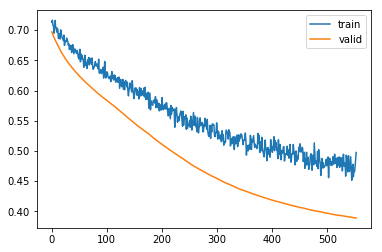

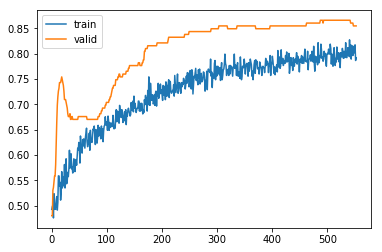

In [26]:
loss_plt, = plt.plot(history.history['loss'], label='train')
val_loss_plt, = plt.plot(history.history['val_loss'], label='valid')

plt.legend(handles=[loss_plt, val_loss_plt])
plt.show()

acc_plt, = plt.plot(history.history['acc'], label='train')
val_acc_plt, = plt.plot(history.history['val_acc'], label='valid')

plt.legend(handles=[loss_plt, val_loss_plt])
plt.show()

In [31]:
df_test['Survived'] = np.apply_along_axis(np.argmax, 1, model.predict(df_one_hot_test))

In [32]:
df_test['Survived'].sum()/len(df_test['Survived'].index)

0.35406698564593303

In [33]:
df_test[['PassengerId', 'Survived']].to_csv(path_or_buf='./out.csv', index=False)    